## Week 5 - PCA and MNIST

### Heather Tweedie, 16/02/23

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
import keras
import keras.layers
import keras.datasets.mnist

from scipy import linalg

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch


2023-02-16 15:44:00.397592: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-16 15:44:00.691433: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-16 15:44:00.756662: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-16 15:44:00.756692: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
# load data
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# re-scale inputs
train_images=train_images/255.0
test_images=test_images/255.0

# check shape of datasets
print("Shape of training images:",train_images.shape)
print("Length of training set labels:",len(train_labels))
print("First label:",train_labels[0])
print("Shape of testing images:",test_images.shape)
print("Length of testing set labels:",len(test_labels))

image_x = len(train_images[0,:,0])
image_y = len(train_images[0,0,:])


Shape of training images: (60000, 28, 28)
Length of training set labels: 60000
First label: 5
Shape of testing images: (10000, 28, 28)
Length of testing set labels: 10000


Define, compile and train model on MNIST dataset:

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(15)
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=100, epochs=15, validation_data=(test_images, test_labels))

2023-02-16 15:44:03.583365: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-16 15:44:03.583895: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-16 15:44:03.583952: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (penguin): /proc/driver/nvidia/version does not exist
2023-02-16 15:44:03.588591: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/15
600/600 [==============================] - 2s 2ms/step - loss: 0.3828 - accuracy: 0.8873 - val_loss: 0.1598 - val_accuracy: 0.9532
Epoch 2/15
600/600 [==============================] - 1s 2ms/step - loss: 0.1450 - accuracy: 0.9567 - val_loss: 0.1474 - val_accuracy: 0.9541
Epoch 3/15
600/600 [==============================] - 1s 2ms/step - loss: 0.1143 - accuracy: 0.9648 - val_loss: 0.1105 - val_accuracy: 0.9670
Epoch 4/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0930 - accuracy: 0.9713 - val_loss: 0.1184 - val_accuracy: 0.9640
Epoch 5/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9744 - val_loss: 0.1136 - val_accuracy: 0.9681
Epoch 6/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0731 - accuracy: 0.9769 - val_loss: 0.1263 - val_accuracy: 0.9664
Epoch 7/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0682 - accuracy: 0.9787 - val_loss: 0.1216 - val_accuracy: 0.9656
Epoch 

Define functions to be used in exercise:

In [4]:
def get_components(images):
    """
    Decomposes a set of images into PCA components.
    
    Params:
        images: the set of images to be decomposed
    """

    num_images = len(images[:,0,0])
    X = np.reshape(images, (num_images, 784))
    mu = np.mean(X, axis=0)
    x = X - mu
    rho = np.cov(x, rowvar = False)

    #Get the eigenvalues and vectors
    vals, vecs = linalg.eigh(rho)
    #vals is a 1-D array of the eigenvalues in ascending order, vecs is a columnwise array of the normalised
    # eigenvectors such that vecs[:,i] is the eigenvector correspondong to vals[i]
    vecs = np.flip(vecs)
    vals = np.flip(vals)

    return vecs, vals, x, mu

Decompose MNIST dataset into PCA components:

(784,)


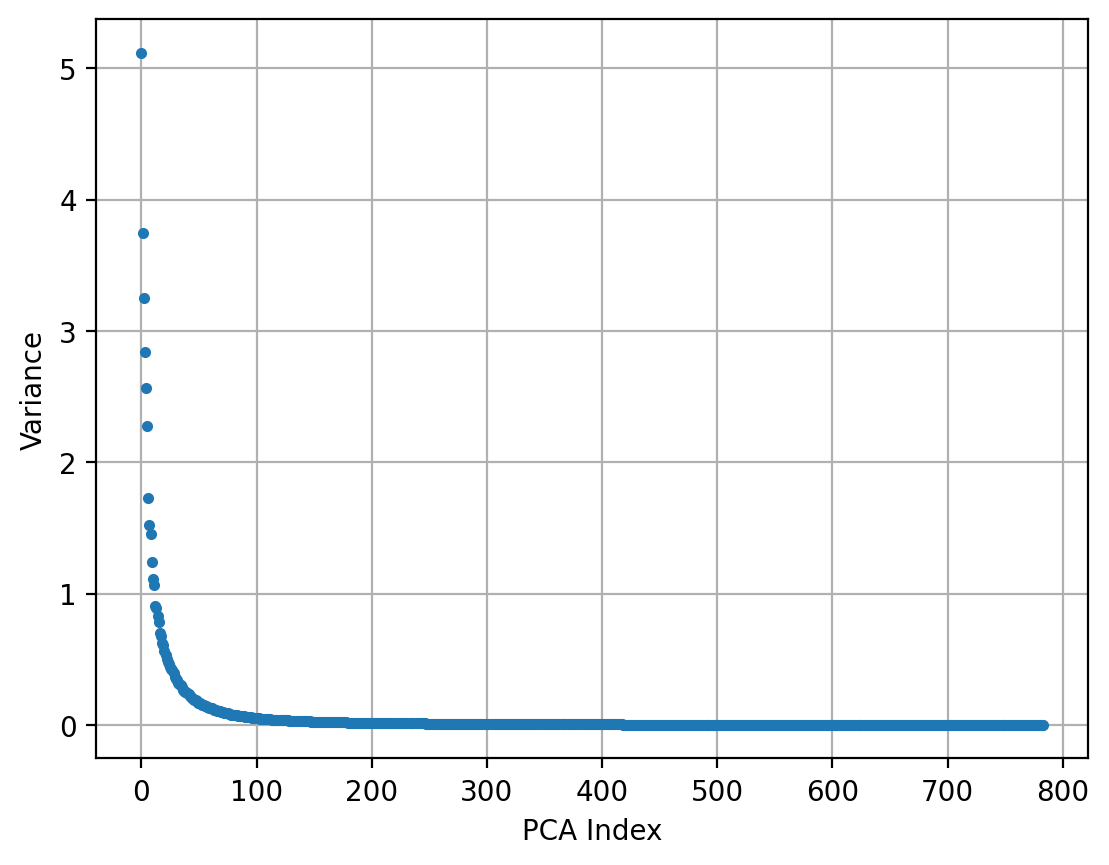

In [5]:
vecs_train, vals_train, x_train, mu_train = get_components(train_images)

print(np.shape(vals_train))
fig,ax=plt.subplots()
index=np.arange((np.shape(vals_train)[0]))
ax.plot(index, vals_train.real, ".")
ax.set_xlabel("PCA Index")
ax.set_ylabel("Variance")
ax.grid()

Test the model against N testing datasets, and plot accuracy.

In [6]:
vecs_test, vals_test, x_test, mu_test = get_components(test_images)

In [7]:
def test_accuracy(model):
    """
    Creates N test datasets of images and tests a given model against these, then plots the accuracies.
    N is the number of the best components to be used in the test dataset images.
    
    Params:
        model: the model to be tested
    """

    N = [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

    test_accuracies = np.empty(len(N))
    for i in range(len(N)):
        P = np.dot(x_test, vecs_test)
        new_test = (np.dot(P[:,0:N[i]], vecs_test.T[0:N[i],:])) + mu_test
        test_loss, test_acc = model.evaluate(new_test, test_labels, verbose = 2)
        test_accuracies[i] = test_acc

    fig, ax = plt.subplots()
    ax.plot(N, test_accuracies)
    ax.set_xlabel('Number of PCA components used (first N)')
    ax.set_ylabel('Test accuracy')
    ax.set_title('Number of PCA components vs test accuracy')

313/313 - 1s - loss: 4.5051 - accuracy: 0.1332 - 601ms/epoch - 2ms/step
313/313 - 0s - loss: 1.7656 - accuracy: 0.6116 - 323ms/epoch - 1ms/step
313/313 - 0s - loss: 0.4505 - accuracy: 0.8870 - 413ms/epoch - 1ms/step
313/313 - 0s - loss: 0.2740 - accuracy: 0.9346 - 498ms/epoch - 2ms/step
313/313 - 0s - loss: 0.2106 - accuracy: 0.9478 - 471ms/epoch - 2ms/step
313/313 - 0s - loss: 0.1859 - accuracy: 0.9561 - 446ms/epoch - 1ms/step
313/313 - 0s - loss: 0.1738 - accuracy: 0.9604 - 353ms/epoch - 1ms/step
313/313 - 0s - loss: 0.1622 - accuracy: 0.9629 - 440ms/epoch - 1ms/step
313/313 - 0s - loss: 0.1554 - accuracy: 0.9644 - 418ms/epoch - 1ms/step
313/313 - 0s - loss: 0.1487 - accuracy: 0.9657 - 413ms/epoch - 1ms/step
313/313 - 0s - loss: 0.1478 - accuracy: 0.9651 - 487ms/epoch - 2ms/step
313/313 - 1s - loss: 0.1451 - accuracy: 0.9663 - 500ms/epoch - 2ms/step


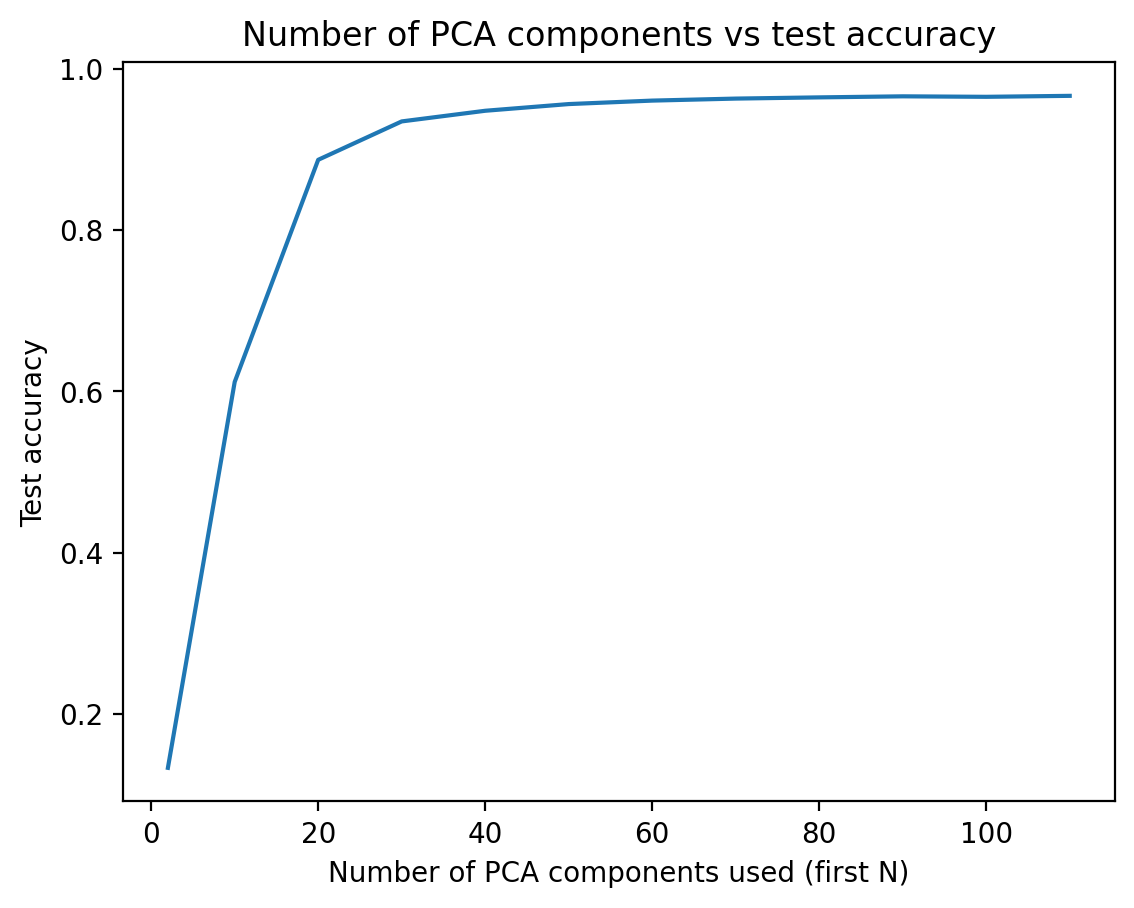

In [8]:
test_accuracy(model)

Retrain network on best 100 PCA components:

Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 0.3801 - accuracy: 0.8852 - val_loss: 0.1808 - val_accuracy: 0.9442
Epoch 2/15
600/600 [==============================] - 1s 2ms/step - loss: 0.1522 - accuracy: 0.9540 - val_loss: 0.1510 - val_accuracy: 0.9562
Epoch 3/15
600/600 [==============================] - 1s 2ms/step - loss: 0.1223 - accuracy: 0.9629 - val_loss: 0.1344 - val_accuracy: 0.9615
Epoch 4/15
600/600 [==============================] - 1s 2ms/step - loss: 0.1091 - accuracy: 0.9667 - val_loss: 0.1116 - val_accuracy: 0.9687
Epoch 5/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0968 - accuracy: 0.9698 - val_loss: 0.1069 - val_accuracy: 0.9680
Epoch 6/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0895 - accuracy: 0.9721 - val_loss: 0.1121 - val_accuracy: 0.9673
Epoch 7/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9743 - val_loss: 0.1069 - val_accuracy: 0.9678
Epoch 

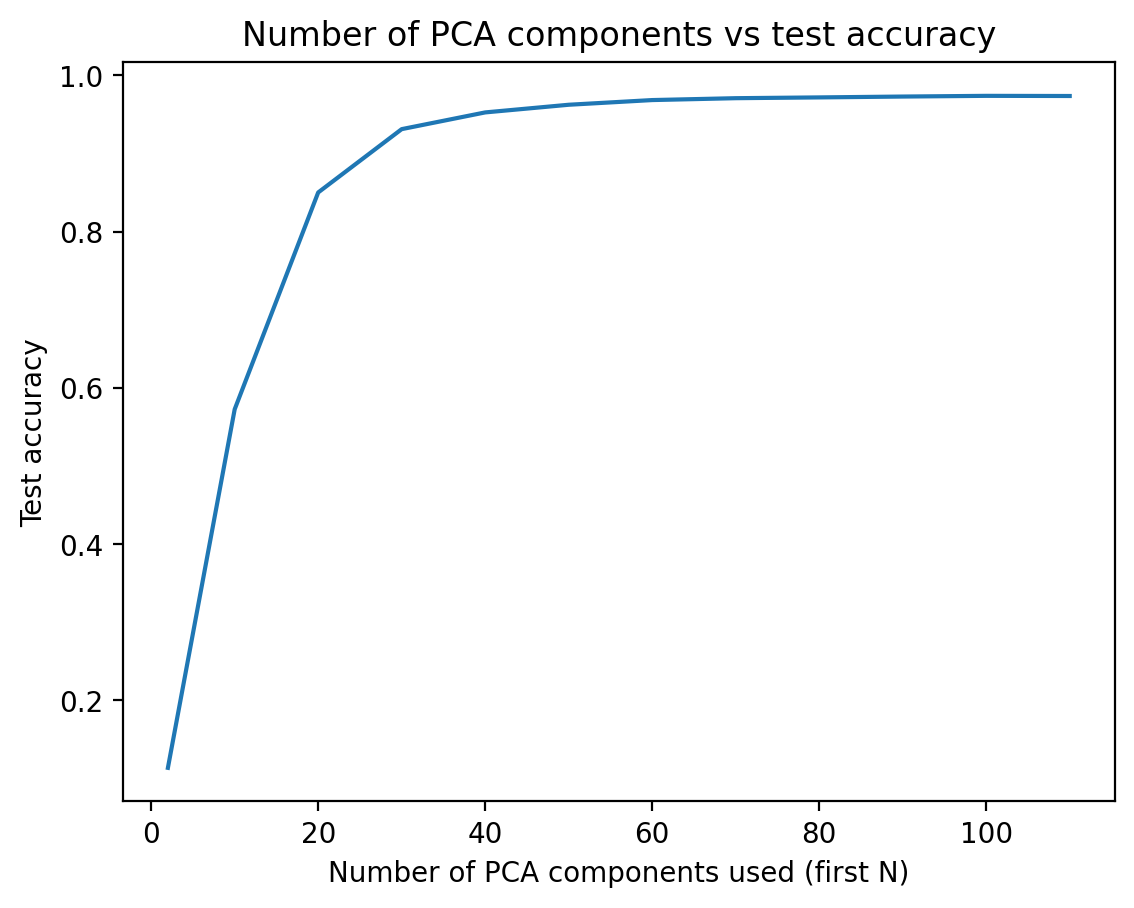

In [9]:
# create new dataset
P = np.dot(x_train, vecs_train)
new_training_100 = (np.dot(P[:,0:100], vecs_train.T[0:100,:])) + mu_train
new_training_100 = np.reshape(new_training_100, (60000,28,28))

# define, compile and train new model on new training dataset
model_100 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(15)
])

model_100.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])

history = model_100.fit(new_training_100, train_labels, batch_size=100, epochs=15, validation_data=(test_images, test_labels))

test_accuracy(model_100)

Retrain network on best 20 PCA components:

Epoch 1/15
600/600 [==============================] - 3s 4ms/step - loss: 0.7015 - accuracy: 0.7807 - val_loss: 0.3128 - val_accuracy: 0.9009
Epoch 2/15
600/600 [==============================] - 2s 3ms/step - loss: 0.3014 - accuracy: 0.9073 - val_loss: 0.2573 - val_accuracy: 0.9233
Epoch 3/15
600/600 [==============================] - 1s 2ms/step - loss: 0.2488 - accuracy: 0.9244 - val_loss: 0.2521 - val_accuracy: 0.9214
Epoch 4/15
600/600 [==============================] - 1s 2ms/step - loss: 0.2269 - accuracy: 0.9315 - val_loss: 0.2167 - val_accuracy: 0.9335
Epoch 5/15
600/600 [==============================] - 1s 2ms/step - loss: 0.2128 - accuracy: 0.9356 - val_loss: 0.2067 - val_accuracy: 0.9402
Epoch 6/15
600/600 [==============================] - 1s 2ms/step - loss: 0.2064 - accuracy: 0.9385 - val_loss: 0.1957 - val_accuracy: 0.9420
Epoch 7/15
600/600 [==============================] - 1s 2ms/step - loss: 0.1982 - accuracy: 0.9405 - val_loss: 0.2051 - val_accuracy: 0.9398
Epoch 

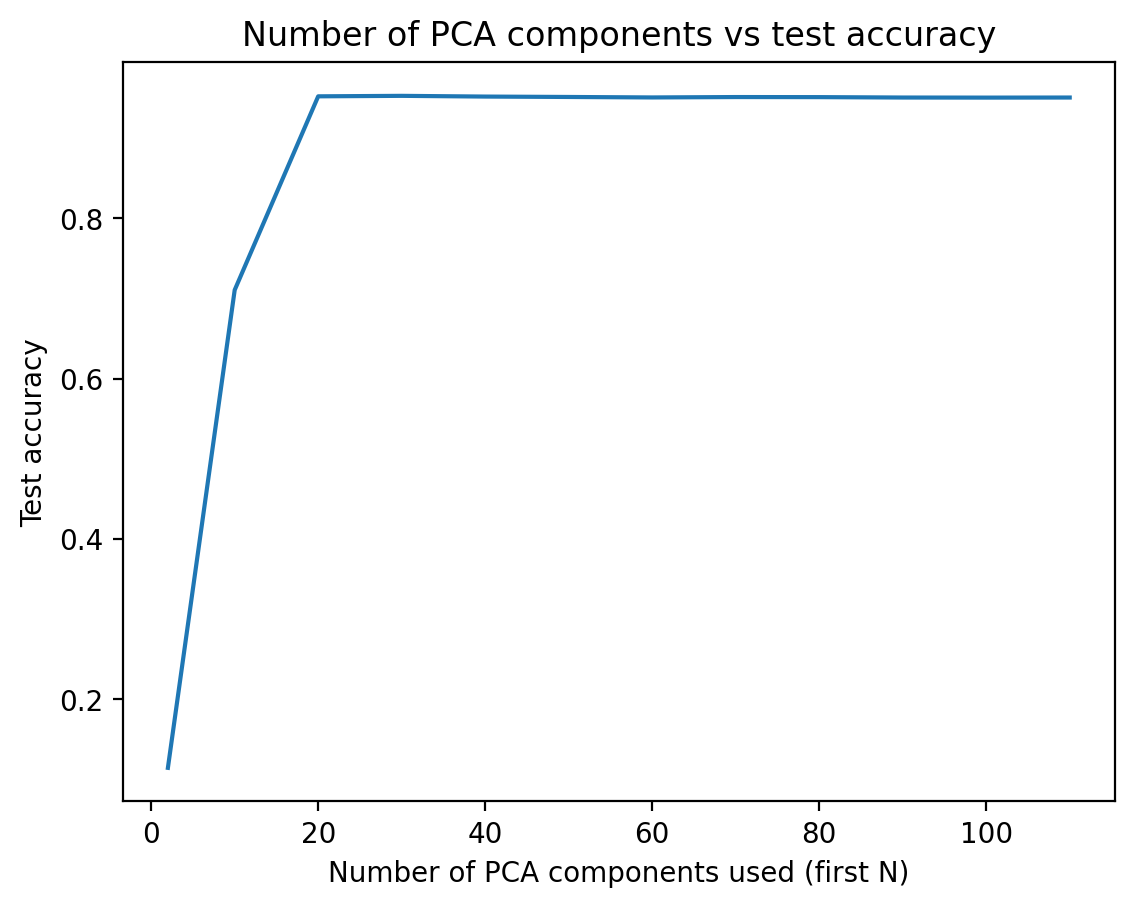

In [10]:
# create new dataset
P = np.dot(x_train, vecs_train)
new_training_20 = (np.dot(P[:,0:20], vecs_train.T[0:20,:])) + mu_train
new_training_20 = np.reshape(new_training_20, (60000,28,28))

# define, compile and train new model
model_20 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(15)
])

model_20.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])

history = model_20.fit(new_training_20, train_labels, batch_size=100, epochs=15, validation_data=(test_images, test_labels))

test_accuracy(model_20)